In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

#pour de meilleurs graphiques

# Chargement des données


In [6]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


print("INFORMATIONS SUR LE DATASET")

print(f"\n Train shape: {train.shape}")
print(f" Test shape: {test.shape}")
print(f"\n Colonnes train: {train.columns.tolist()[:5]}... (première 5)")
print(f" Colonnes test: {test.columns.tolist()[:5]}... (5 premièrs )")

INFORMATIONS SUR LE DATASET

 Train shape: (42000, 785)
 Test shape: (28000, 784)

 Colonnes train: ['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3']... (première 5)
 Colonnes test: ['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4']... (5 premièrs )


In [7]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [8]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [9]:
print(train)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

In [10]:
print(test)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27995       0       0       0       0       0       0       0       0       0   
27996       0       0       0       0       0       0       0       0       0   
27997       0       0       0       0       0       0       0       0       0   
27998       0       0       0       0       0       0       0       0       0   
27999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

In [11]:
# Vérification des valeurs manquantes

print("VALEURS MANQUANTES")

print(f"Train: {train.isnull().sum().sum()} valeurs manquantes")
print(f"Test: {test.isnull().sum().sum()} valeurs manquantes")

VALEURS MANQUANTES
Train: 0 valeurs manquantes
Test: 0 valeurs manquantes


In [13]:
# Distribution des classes

print("DISTRIBUTION DES  (LABELS)")

print(train['label'].value_counts().sort_index())

DISTRIBUTION DES  (LABELS)
label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: count, dtype: int64


# Question 1a: Afficher une image quelconque avec son label

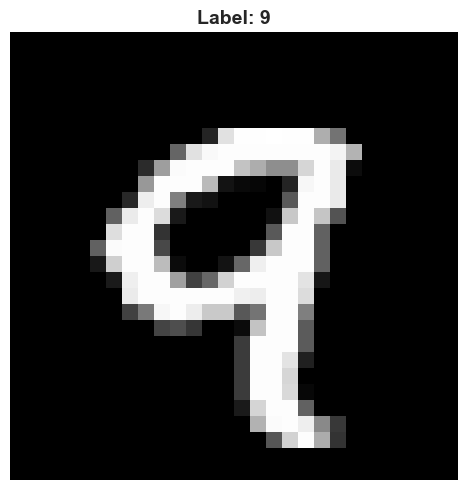

In [14]:
def afficher_image(data, index, titre=None):



    if 'label' in data.columns:
        pixels = data.iloc[index, 1:].values
        label = data.iloc[index, 0]
        titre = titre or f"Label: {label}"
    else:
        pixels = data.iloc[index].values
        titre = titre or "Image de test"

    image = pixels.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(titre, fontsize=14, fontweight='bold')
    plt.axis('off')
    return label if 'label' in data.columns else None


# Affichage d'une image aléatoire
fig, ax = plt.subplots(figsize=(5, 5))
index_aleatoire = np.random.randint(0, len(train))
afficher_image(train, index_aleatoire)
plt.tight_layout()
plt.show()

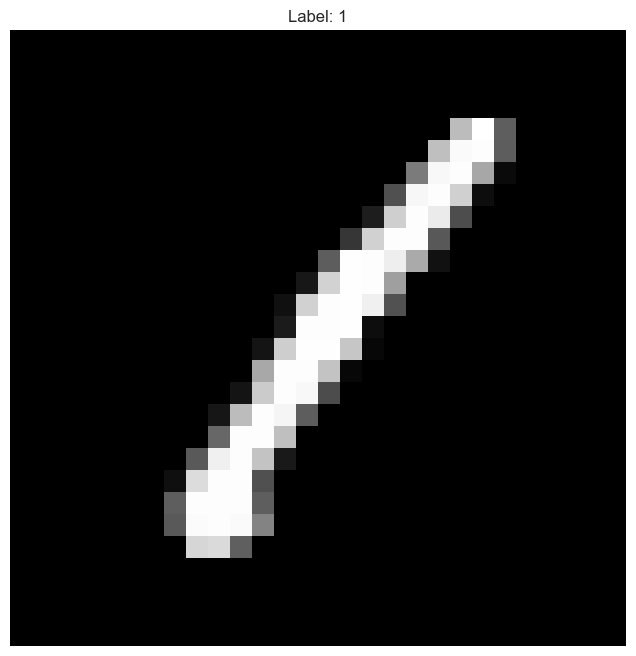

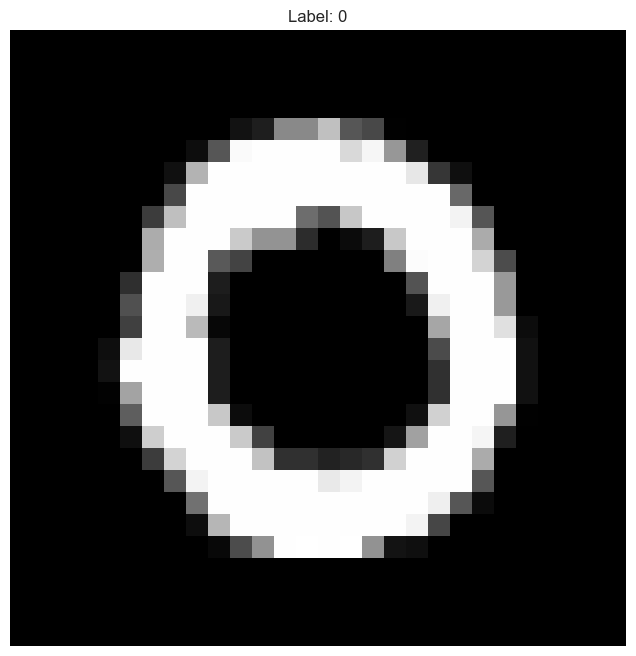

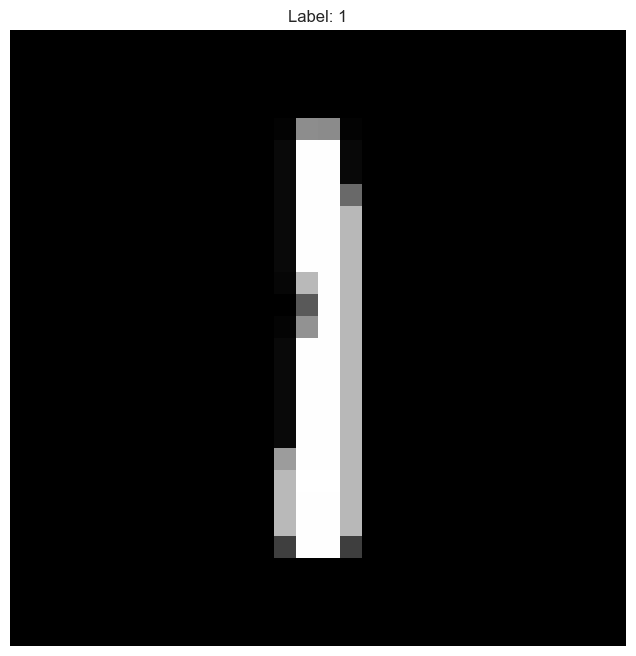

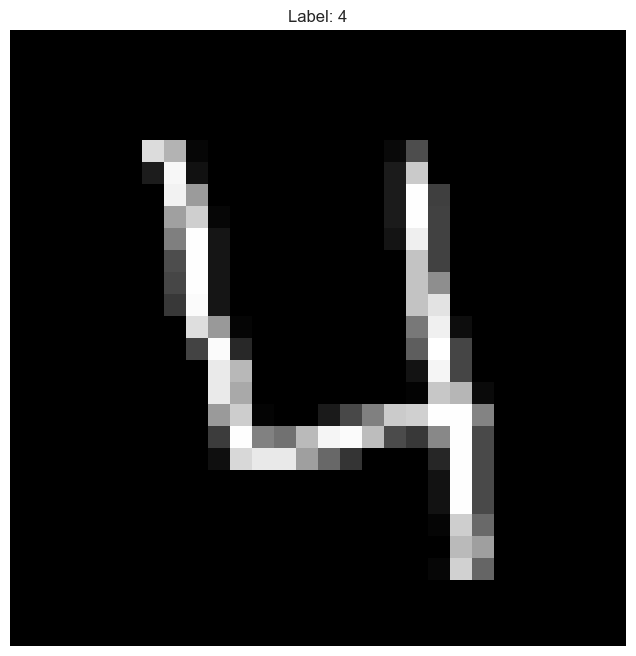

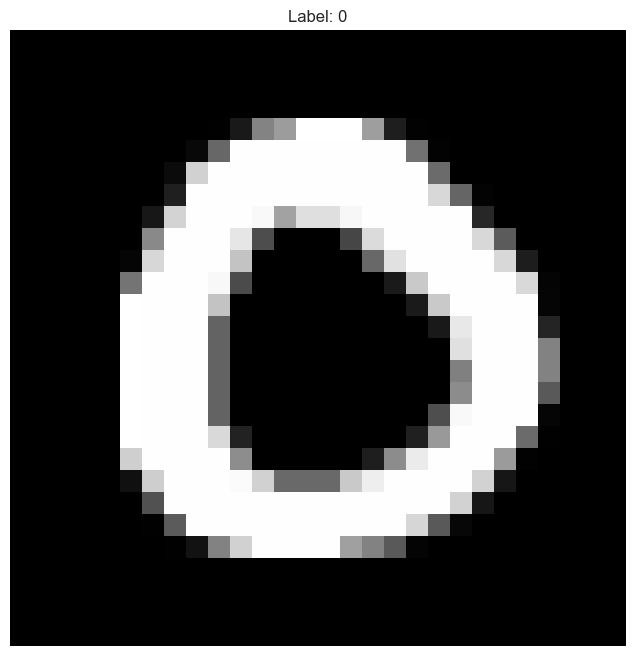

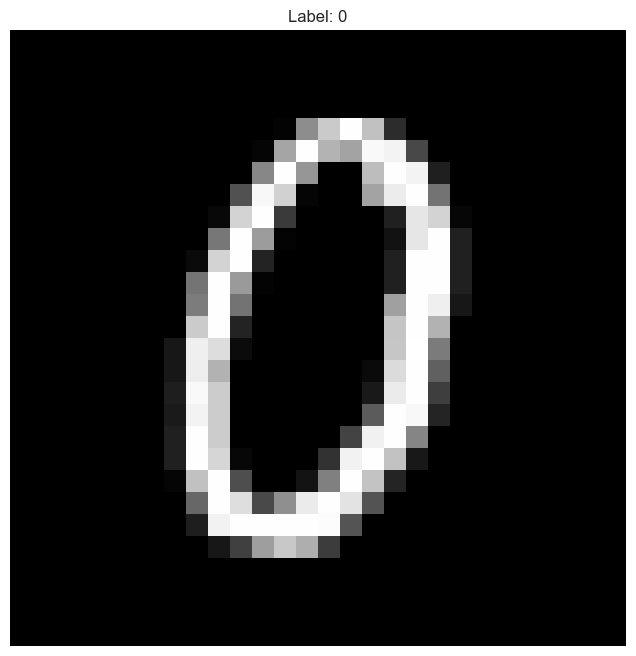

In [15]:
# Afficher les 6 premières images du dataset
for i in range(6):
    img = train.iloc[i, 1:].values.reshape(28, 28)  # pixels
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {train.iloc[i, 0]}")
    plt.axis('off')
    plt.show()

# Question 1b: Afficher les chiffres de 0 à 9

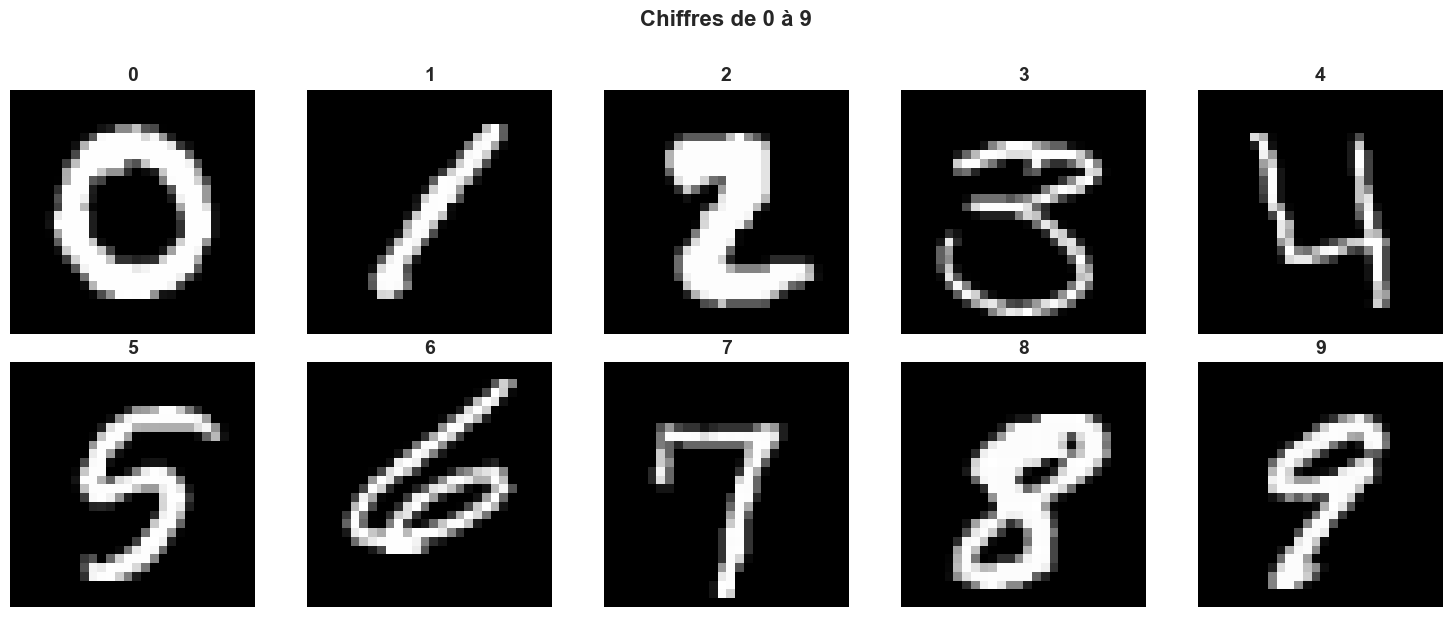

In [16]:
def _():
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle('Chiffres de 0 à 9', fontsize=16, fontweight='bold', y=1.02)

    for digit in range(10):
        # Trouver la première occurrence de chaque chiffre
        index = train[train['label'] == digit].index[0]

        row = digit // 5
        col = digit % 5

        pixels = train.iloc[index, 1:].values.reshape(28, 28)
        axes[row, col].imshow(pixels, cmap='gray')
        axes[row, col].set_title(f'{digit}', fontsize=14, fontweight='bold')
        axes[row, col].axis('off')

    plt.tight_layout()
    return plt.show()


_()

# Question 1c: Les 9 premières images du chiffre 7

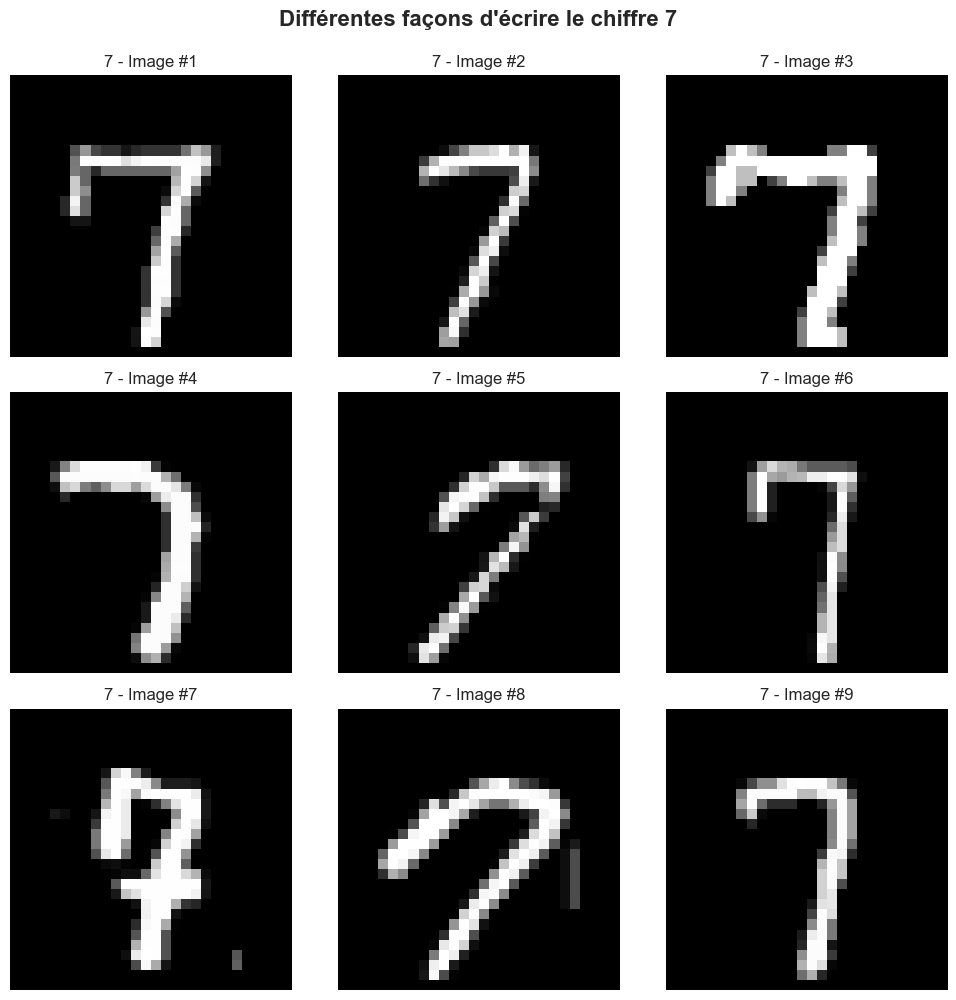

In [17]:
def _():
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    fig.suptitle('Différentes façons d\'écrire le chiffre 7', fontsize=16, fontweight='bold', y=0.995)

    indices_sept = train[train['label'] == 7].index[:9]

    for i, idx in enumerate(indices_sept):
        row = i // 3
        col = i % 3

        pixels = train.iloc[idx, 1:].values.reshape(28, 28)
        axes[row, col].imshow(pixels, cmap='gray')
        axes[row, col].set_title(f'7 - Image #{i+1}', fontsize=12)
        axes[row, col].axis('off')

    plt.tight_layout()
    return plt.show()


_()

# Question 1d: Représentant moyen de chaque chiffre

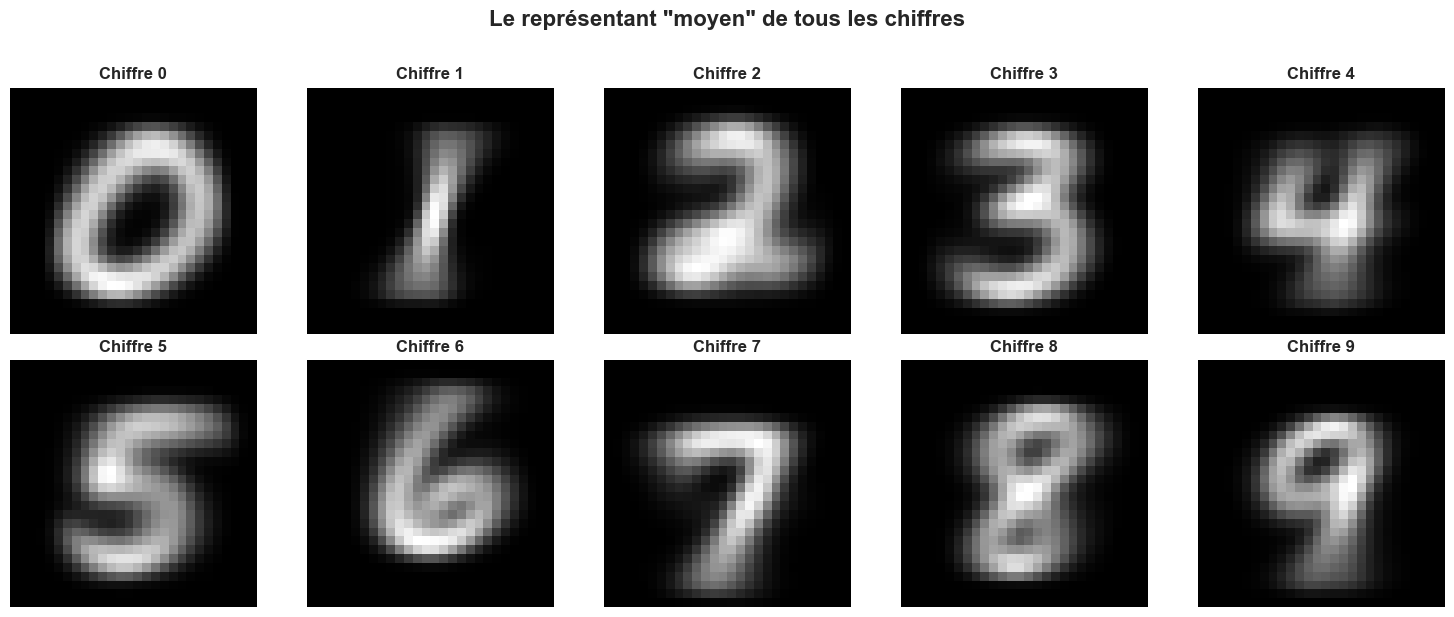

In [18]:
def _():
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle('Le représentant "moyen" de tous les chiffres', 
                 fontsize=16, fontweight='bold', y=1.02)

    moyennes = {}
    for digit in range(10):
        # Extraire toutes les images de ce chiffre
        images_digit = train[train['label'] == digit].iloc[:, 1:].values

        # Calculer la moyenne
        moyenne = images_digit.mean(axis=0).reshape(28, 28)
        moyennes[digit] = moyenne

        row = digit // 5
        col = digit % 5

        axes[row, col].imshow(moyenne, cmap='gray')
        axes[row, col].set_title(f'Chiffre {digit}', fontsize=12, fontweight='bold')
        axes[row, col].axis('off')

    plt.tight_layout()
    return plt.show()


_()

# 3. Préparation des Données pour l'Entraînement

In [20]:
# Séparation features et target
X = train.drop('label', axis=1).values
y = train['label'].values
X_test_final = test.values




# Normalisation des données 
X_normalized = X / 255.0
X_test_normalized = X_test_final / 255.0

In [21]:
# Split train/validation


X_train, X_val, y_train, y_val = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42, stratify=y
)


print("PRÉPARATION DES DONNÉES")

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test_normalized.shape}")

PRÉPARATION DES DONNÉES
X_train shape: (33600, 784)
X_val shape: (8400, 784)
y_train shape: (33600,)
y_val shape: (8400,)
X_test shape: (28000, 784)


# Question 3: Entraînement et Optimisation de Plusieurs Modèles

### Modèle 1: Decision Tree avec GridSearch

In [22]:

# Entraînement avec les  hyperparamètres de base

dt_base = DecisionTreeClassifier(random_state=42, max_depth=20)
dt_base.fit(X_train, y_train)
y_pred_dt_base = dt_base.predict(X_val)
acc_dt_base = accuracy_score(y_val, y_pred_dt_base)

print(f"\n Performance sans optimisation: {acc_dt_base:.4f}")


# GridSearch pour optimisation
param_grid_dt = {
    'max_depth': [15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print("\n Optimisation avec GridSearch ")
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                       param_grid_dt, cv=3, n_jobs=-1, verbose=1)
dt_grid.fit(X_train, y_train)

print(f"\n Meilleurs paramètres: {dt_grid.best_params_}")
print(f" Meilleur score CV: {dt_grid.best_score_:.4f}")


 Performance sans optimisation: 0.8644

 Optimisation avec GridSearch 
Fitting 3 folds for each of 27 candidates, totalling 81 fits

 Meilleurs paramètres: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
 Meilleur score CV: 0.8429


In [24]:
# Évaluation sur validation
y_pred_dt = dt_grid.predict(X_val)
acc_dt = accuracy_score(y_val, y_pred_dt)
print(f" Accuracy sur validation: {acc_dt:.4f}")

 Accuracy sur validation: 0.8644


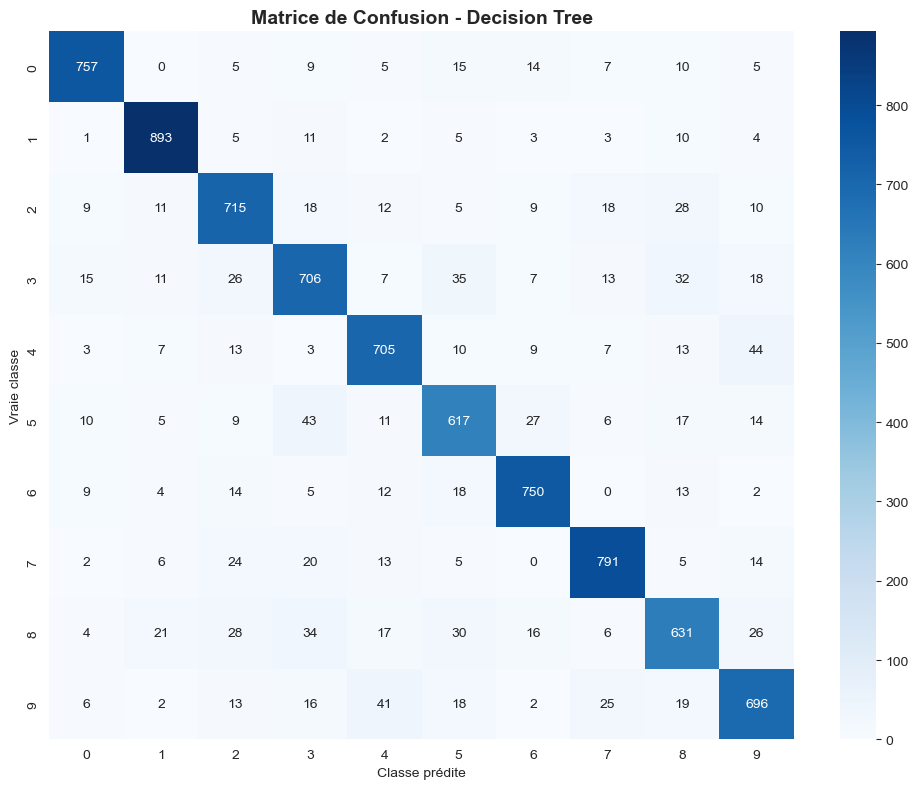

In [25]:
# Matrice de confusion
cm_dt = confusion_matrix(y_val, y_pred_dt)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matrice de Confusion - Decision Tree', fontsize=14, fontweight='bold')
plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')
plt.tight_layout()
plt.show()

### Modèle 2: Random Forest avec GridSearch

In [26]:
# Entraînement avec hyperparamètres de base
rf_base = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_base.fit(X_train, y_train)
y_pred_rf_base = rf_base.predict(X_val)
acc_rf_base = accuracy_score(y_val, y_pred_rf_base)

print(f"\n Performance sans optimisation: {acc_rf_base:.4f}")


 Performance sans optimisation: 0.9639


In [27]:
# GridSearch pour optimisation
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [20, 25, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

print("\n Optimisation avec GridSearch")
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1), 
                       param_grid_rf, cv=3, n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)

print(f"\n Meilleurs paramètres: {rf_grid.best_params_}")
print(f" Meilleur score CV: {rf_grid.best_score_:.4f}")


 Optimisation avec GridSearch
Fitting 3 folds for each of 24 candidates, totalling 72 fits

 Meilleurs paramètres: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
 Meilleur score CV: 0.9624


In [28]:
# Évaluation sur validation
y_pred_rf = rf_grid.predict(X_val)
acc_rf = accuracy_score(y_val, y_pred_rf)
print(f" Accuracy sur validation: {acc_rf:.4f}")

 Accuracy sur validation: 0.9669


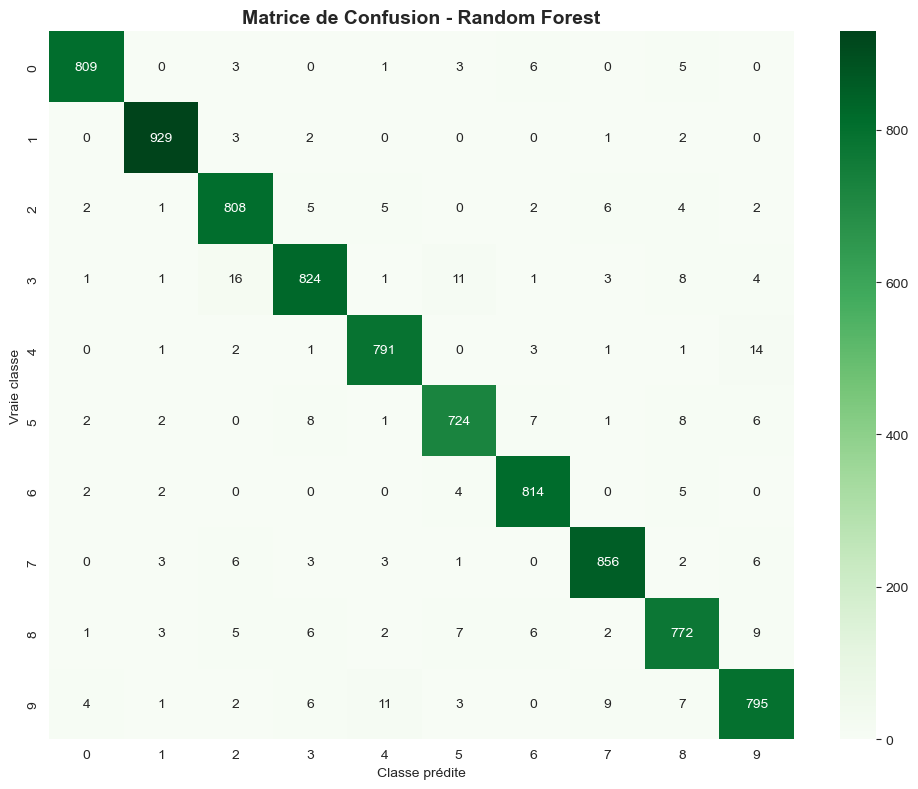

In [29]:
# Matrice de confusion
cm_rf = confusion_matrix(y_val, y_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.title('Matrice de Confusion - Random Forest', fontsize=14, fontweight='bold')
plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')
plt.tight_layout()
plt.show()

# Modèle 3: Support Vector Machine (SVM)

In [30]:
#  un subset pour accélérer l'entraînement
subset_size = 10000
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

In [31]:
# Entraînement avec hyperparamètres de base
svm_base = SVC(kernel='rbf', random_state=42)
svm_base.fit(X_train_subset, y_train_subset)
y_pred_svm_base = svm_base.predict(X_val)
acc_svm_base = accuracy_score(y_val, y_pred_svm_base)

print(f"\n Performance sans optimisation (sur subset): {acc_svm_base:.4f}")


 Performance sans optimisation (sur subset): 0.9587


In [32]:
#GridSearch pour optimisation
param_grid_svm = {
    'C': [1, 10, 100],
    'gamma': ['scale', 'auto', 0.001],
    'kernel': ['rbf']
}

print("\n Optimisation avec GridSearch en cours (peut prendre du temps)...")
svm_grid = GridSearchCV(SVC(random_state=42), 
                        param_grid_svm, cv=3, n_jobs=-1, verbose=1)
svm_grid.fit(X_train_subset, y_train_subset)

print(f"\n Meilleurs paramètres: {svm_grid.best_params_}")
print(f" Meilleur score CV: {svm_grid.best_score_:.4f}")


 Optimisation avec GridSearch en cours (peut prendre du temps)...
Fitting 3 folds for each of 9 candidates, totalling 27 fits

 Meilleurs paramètres: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
 Meilleur score CV: 0.9646


In [33]:
# Évaluation sur validation
y_pred_svm = svm_grid.predict(X_val)
acc_svm = accuracy_score(y_val, y_pred_svm)
print(f" Accuracy sur validation: {acc_svm:.4f}")



 Accuracy sur validation: 0.9657


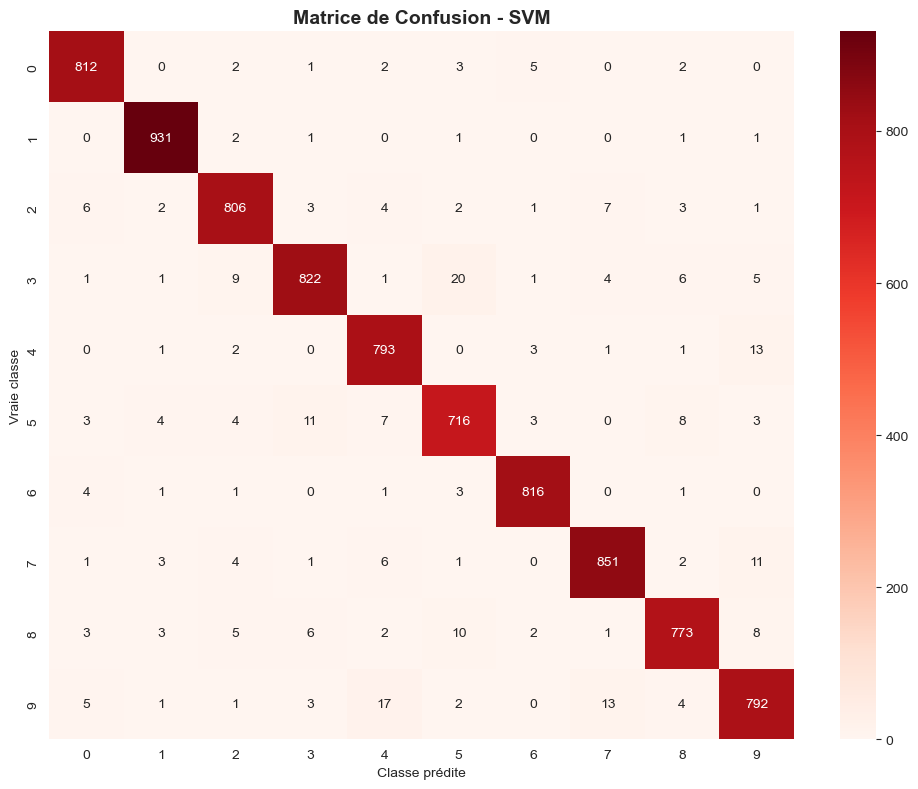

In [34]:
# Matrice de confusion
cm_svm = confusion_matrix(y_val, y_pred_svm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Reds', cbar=True)
plt.title('Matrice de Confusion - SVM', fontsize=14, fontweight='bold')
plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')
plt.tight_layout()
plt.show()

# Comparaison des Modèles et Sélection du Meilleur

In [35]:
modeles = {
    'Decision Tree': acc_dt,
    'Random Forest': acc_rf,
    'SVM': acc_svm
}


In [36]:
# Affichage sous forme de tableau
resultats_df = pd.DataFrame({
    'Modèle': list(modeles.keys()),
    'Accuracy': list(modeles.values())
}).sort_values('Accuracy', ascending=False)

print("\n", resultats_df.to_string(index=False))



        Modèle  Accuracy
Random Forest  0.966905
          SVM  0.965714
Decision Tree  0.864405


(0.9, 1.0)

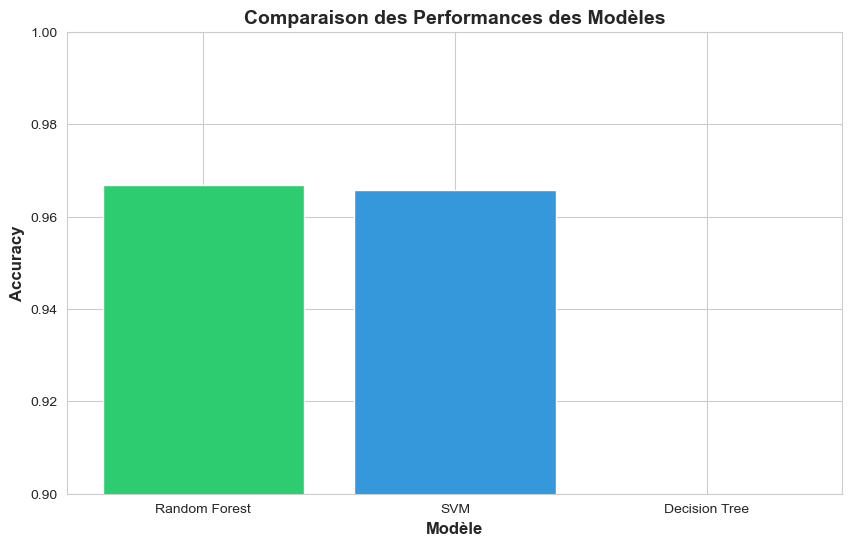

In [37]:
# Visualisation
plt.figure(figsize=(10, 6))
bars = plt.bar(resultats_df['Modèle'], resultats_df['Accuracy'], 
               color=['#2ecc71', '#3498db', '#e74c3c'])
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.xlabel('Modèle', fontsize=12, fontweight='bold')
plt.title('Comparaison des Performances des Modèles', fontsize=14, fontweight='bold')
plt.ylim([0.9, 1.0])

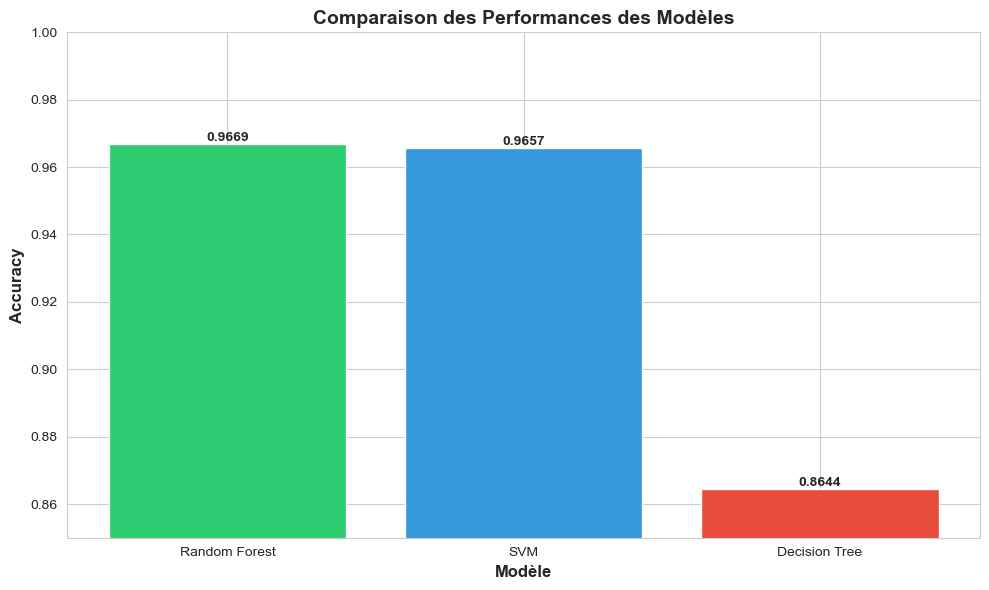

In [56]:
# Visualisation
plt.figure(figsize=(10, 6))
bars = plt.bar(resultats_df['Modèle'], resultats_df['Accuracy'], 
               color=['#2ecc71', '#3498db', '#e74c3c'])
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.xlabel('Modèle', fontsize=12, fontweight='bold')
plt.title('Comparaison des Performances des Modèles', fontsize=14, fontweight='bold')
plt.ylim([0.85, 1.0])  ###### ajout 

# Ajout des valeurs sur les barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [58]:
# Sélection du meilleur modèle
meilleur_modele_nom = resultats_df.iloc[0]['Modèle']
print(f"\n MEILLEUR MODÈLE: {meilleur_modele_nom}")


 MEILLEUR MODÈLE: Random Forest


In [41]:
#Sauvegarde du meilleur modèle
if meilleur_modele_nom == 'Decision Tree':
    meilleur_modele = dt_grid.best_estimator_
elif meilleur_modele_nom == 'Random Forest':
    meilleur_modele = rf_grid.best_estimator_
else:
    meilleur_modele = svm_grid.best_estimator_


### Sérialisation du Meilleur Modèle


In [42]:
# Sauvegarde en pickle
with open('best_model.pkl', 'wb') as f:
    pickle.dump(meilleur_modele, f)
print("\n Modèle sauvegardé dans 'best_model.pkl'")


y_pred_best = meilleur_modele.predict(X_val)
print(classification_report(y_val, y_pred_best))




    


 Modèle sauvegardé dans 'best_model.pkl'
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       827
           1       0.99      0.99      0.99       937
           2       0.96      0.97      0.96       835
           3       0.96      0.95      0.96       870
           4       0.97      0.97      0.97       814
           5       0.96      0.95      0.96       759
           6       0.97      0.98      0.98       827
           7       0.97      0.97      0.97       880
           8       0.95      0.95      0.95       813
           9       0.95      0.95      0.95       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



# Question 7: Afficher les Bonnes Prédictions

In [43]:
# Prédictions sur l'ensemble de validation
y_pred_val = meilleur_modele.predict(X_val)


Nombre de bonnes prédictions: 8122/8400
Taux de réussite: 96.69%


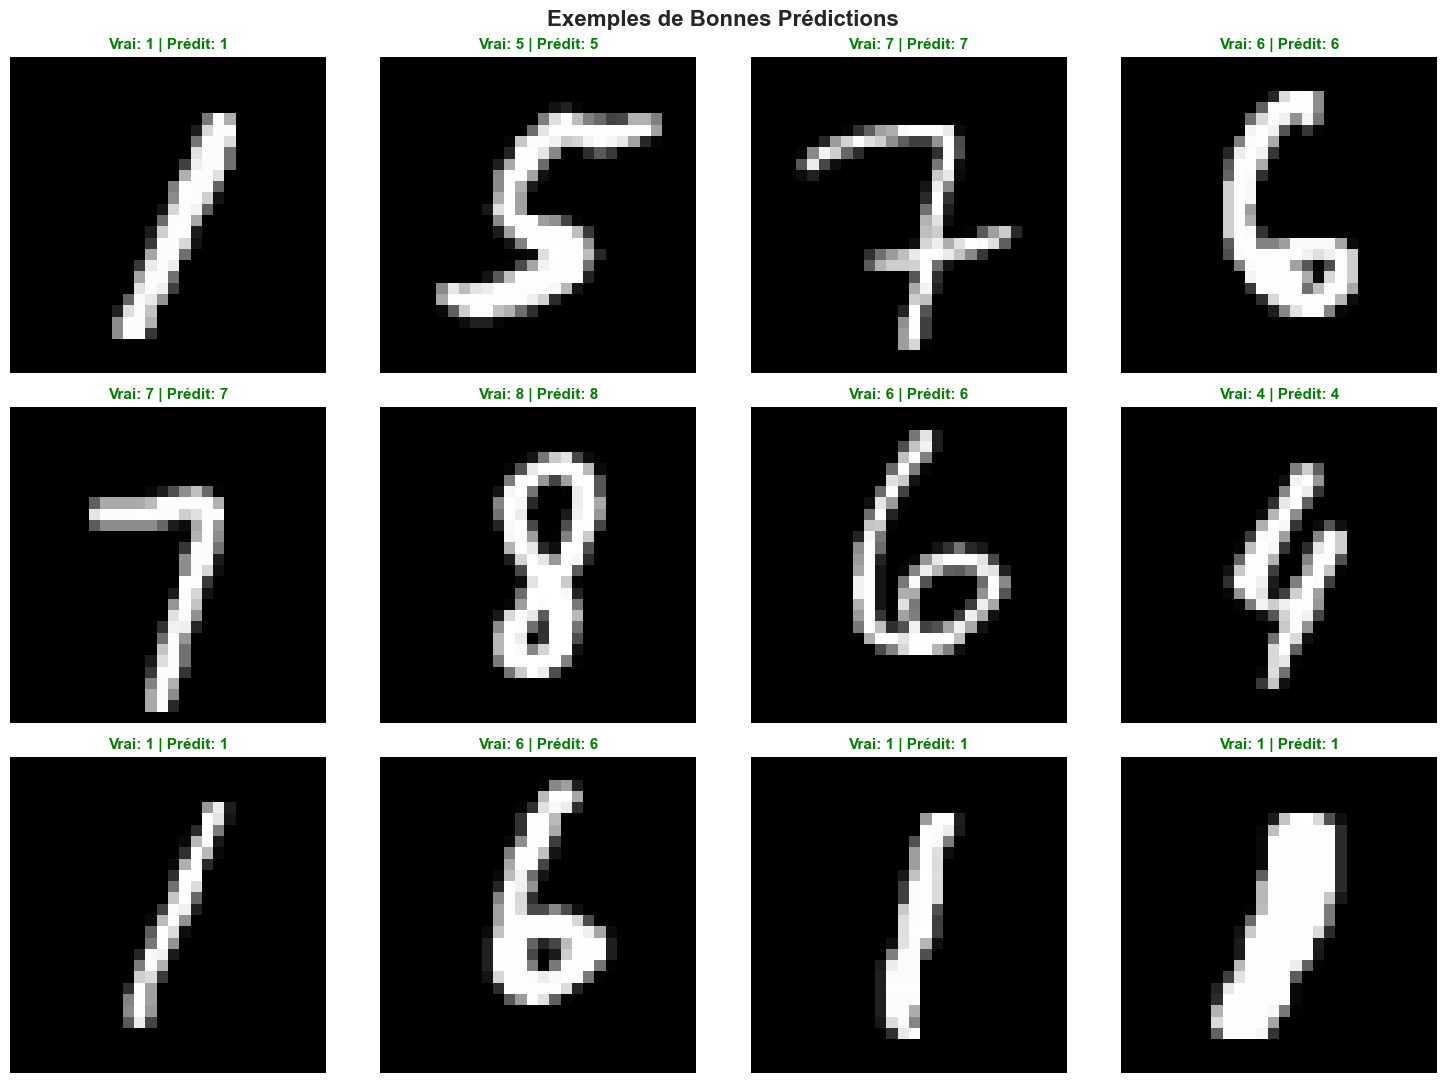

In [44]:
# Identifier les bonnes prédictions
bonnes_predictions = np.where(y_pred_val == y_val)[0]
print(f"\nNombre de bonnes prédictions: {len(bonnes_predictions)}/{len(y_val)}")
print(f"Taux de réussite: {len(bonnes_predictions)/len(y_val)*100:.2f}%")

# Afficher 12 exemples de bonnes prédictions
fig, axes = plt.subplots(3, 4, figsize=(15, 11))
fig.suptitle('Exemples de Bonnes Prédictions', fontsize=16, fontweight='bold')

indices_aleatoires = np.random.choice(bonnes_predictions, 12, replace=False)

for i, idx in enumerate(indices_aleatoires):
    row = i // 4
    col = i % 4
    
    image = X_val[idx].reshape(28, 28)
    vraie_classe = y_val[idx]
    prediction = y_pred_val[idx]
    
    axes[row, col].imshow(image, cmap='gray')
    axes[row, col].set_title(f'Vrai: {vraie_classe} | Prédit: {prediction}', 
                             fontsize=11, color='green', fontweight='bold')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Question 8: Afficher les Prédictions Erronées et Analyse

In [45]:
# Identifier les mauvaises prédictions
mauvaises_predictions = np.where(y_pred_val != y_val)[0]
print(f"\nNombre d'erreurs: {len(mauvaises_predictions)}/{len(y_val)}")
print(f"Taux d'erreur: {len(mauvaises_predictions)/len(y_val)*100:.2f}%")




Nombre d'erreurs: 278/8400
Taux d'erreur: 3.31%


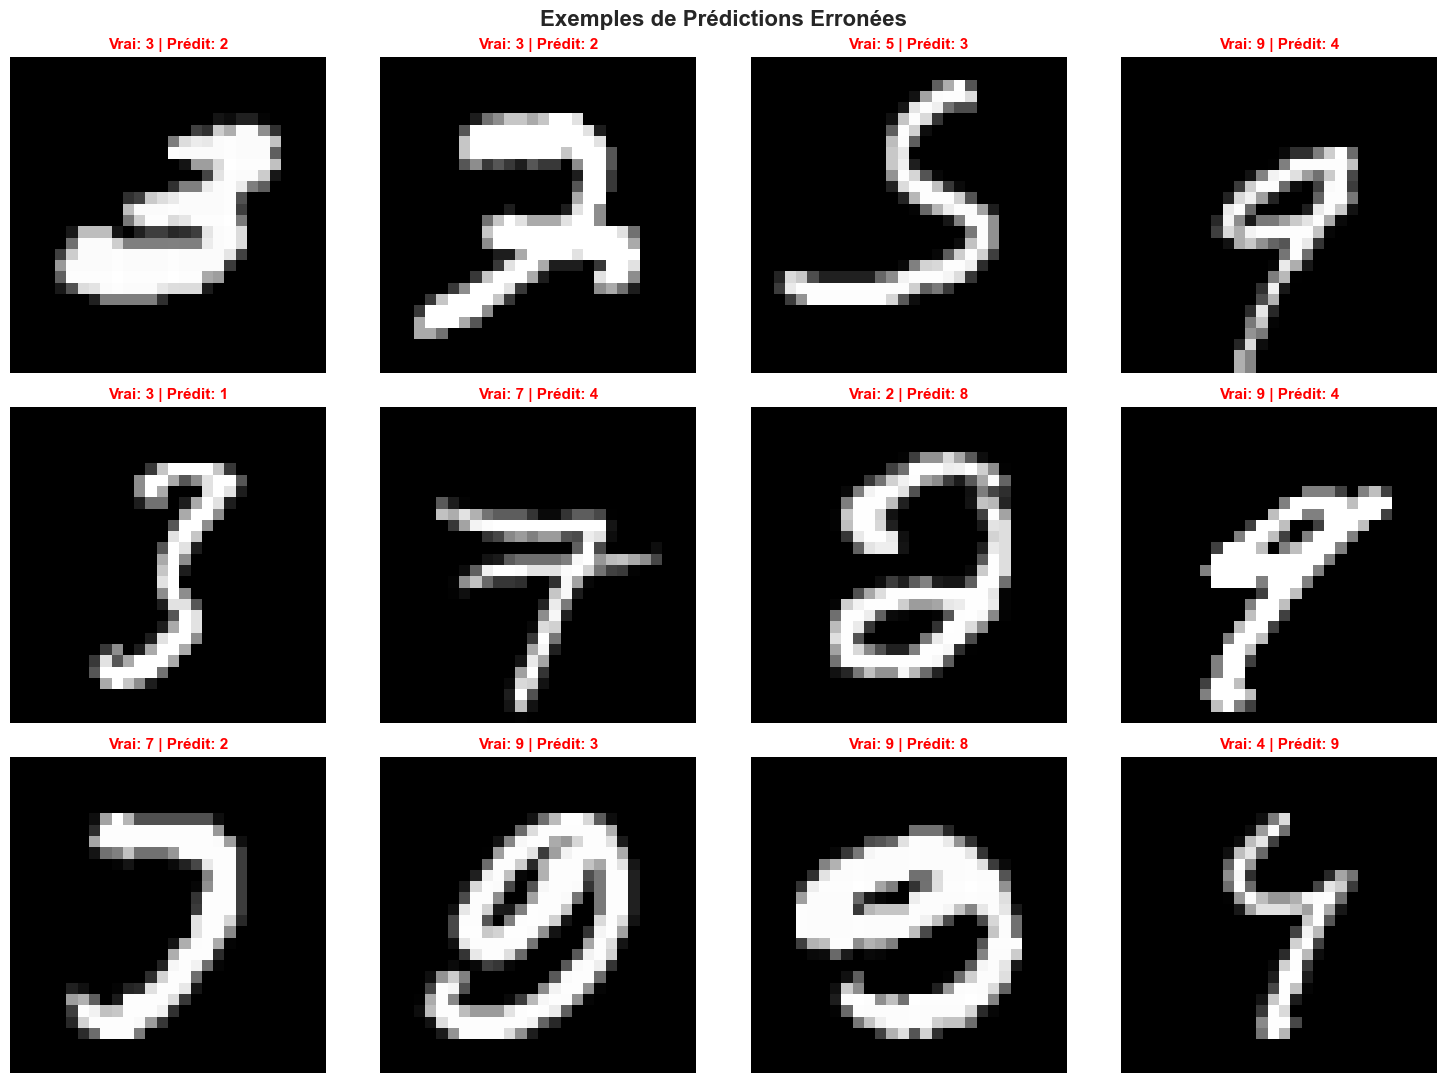

In [46]:
# Afficher 12 exemples d'erreurs
fig, axes = plt.subplots(3, 4, figsize=(15, 11))
fig.suptitle('Exemples de Prédictions Erronées', fontsize=16, fontweight='bold')

if len(mauvaises_predictions) > 0:
    n_display = min(12, len(mauvaises_predictions))
    indices_erreurs = np.random.choice(mauvaises_predictions, n_display, replace=False)
    
    for i, idx in enumerate(indices_erreurs):
        row = i // 4
        col = i % 4
        
        image = X_val[idx].reshape(28, 28)
        vraie_classe = y_val[idx]
        prediction = y_pred_val[idx]
        
        axes[row, col].imshow(image, cmap='gray')
        axes[row, col].set_title(f'Vrai: {vraie_classe} | Prédit: {prediction}', 
                                 fontsize=11, color='red', fontweight='bold')
        axes[row, col].axis('off')
    
    # Cacher les subplots vides si moins de 12 erreurs
    for i in range(n_display, 12):
        row = i // 4
        col = i % 4
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()



In [47]:
# Analyse: Sur quel chiffre le modèle se trompe le plus?
erreurs_par_chiffre = {}
for idx in mauvaises_predictions:
    vrai_chiffre = y_val[idx]
    erreurs_par_chiffre[vrai_chiffre] = erreurs_par_chiffre.get(vrai_chiffre, 0) + 1



erreurs_df = pd.DataFrame({
    'Chiffre': list(erreurs_par_chiffre.keys()),
    'Nombre d\'erreurs': list(erreurs_par_chiffre.values())
}).sort_values('Nombre d\'erreurs', ascending=False)

print("\n", erreurs_df.to_string(index=False))




  Chiffre  Nombre d'erreurs
       3                46
       9                43
       8                41
       5                35
       2                27
       7                24
       4                23
       0                18
       6                13
       1                 8


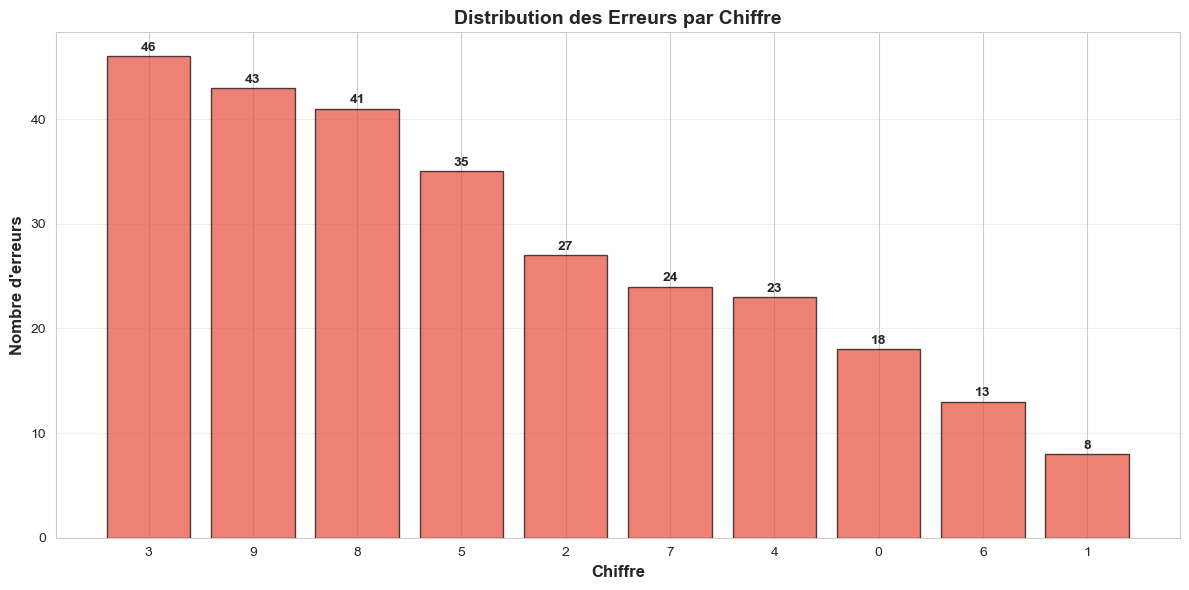

In [48]:
# Visualisation
plt.figure(figsize=(12, 6))
plt.bar(erreurs_df['Chiffre'].astype(str), erreurs_df['Nombre d\'erreurs'], 
        color='#e74c3c', alpha=0.7, edgecolor='black')
plt.xlabel('Chiffre', fontsize=12, fontweight='bold')
plt.ylabel('Nombre d\'erreurs', fontsize=12, fontweight='bold')
plt.title('Distribution des Erreurs par Chiffre', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(erreurs_df['Nombre d\'erreurs']):
    plt.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()



In [49]:
# Matrice de confusion pour analyser les confusions


chiffre_plus_erreurs = erreurs_df.iloc[0]['Chiffre']
print(f"\n Le chiffre avec le plus d'erreurs: {chiffre_plus_erreurs}")




 Le chiffre avec le plus d'erreurs: 3


In [50]:
# Analyser avec quels chiffres il est confondu
indices_erreurs_chiffre = [idx for idx in mauvaises_predictions if y_val[idx] == chiffre_plus_erreurs]
confusions = {}
for idx in indices_erreurs_chiffre:
    prediction = y_pred_val[idx]
    confusions[prediction] = confusions.get(prediction, 0) + 1

print(f"\nConfusions du chiffre {chiffre_plus_erreurs}:")
for chiffre_confondu, count in sorted(confusions.items(), key=lambda x: x[1], reverse=True):
    print(f"  - Confondu avec {chiffre_confondu}: {count} fois")




Confusions du chiffre 3:
  - Confondu avec 2: 16 fois
  - Confondu avec 5: 11 fois
  - Confondu avec 8: 8 fois
  - Confondu avec 9: 4 fois
  - Confondu avec 7: 3 fois
  - Confondu avec 1: 1 fois
  - Confondu avec 0: 1 fois
  - Confondu avec 6: 1 fois
  - Confondu avec 4: 1 fois


In [51]:
print("\n" + "="*60)
print(" INTERPRÉTATION DES ERREURS")
print("="*60)
print("""
Les erreurs de classification peuvent être dues à:
1. Similarité visuelle entre certains chiffres (1 et 7, 5 et 3)
2. Variations dans l'écriture manuscrite
3. Qualité de l'image ou pixels flous
4. Chiffres mal formés ou ambigus
5. Limitations du modèle choisi

Pistes d'amélioration:
- Augmentation de données (rotation, translation, zoom)
- Modèles de Deep Learning (CNN) pour mieux capturer les features
- Ensemble methods combinant plusieurs modèles
- Feature engineering plus sophistiqué
""")

#


 INTERPRÉTATION DES ERREURS

Les erreurs de classification peuvent être dues à:
1. Similarité visuelle entre certains chiffres (1 et 7, 5 et 3)
2. Variations dans l'écriture manuscrite
3. Qualité de l'image ou pixels flous
4. Chiffres mal formés ou ambigus
5. Limitations du modèle choisi

Pistes d'amélioration:
- Augmentation de données (rotation, translation, zoom)
- Modèles de Deep Learning (CNN) pour mieux capturer les features
- Ensemble methods combinant plusieurs modèles
- Feature engineering plus sophistiqué



# Prédictions sur le Test Set 

In [52]:

# Prédictions finales
predictions_test = meilleur_modele.predict(X_test_normalized)




 Fichier de soumission créé: 'submission.csv'
   Nombre de prédictions: 28000

 Aperçu des premières prédictions:
   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3
5        6      7
6        7      0
7        8      3
8        9      0
9       10      3

 Distribution des chiffres prédits:
Label
0    2777
1    3198
2    2846
3    2772
4    2746
5    2502
6    2769
7    2873
8    2730
9    2787
Name: count, dtype: int64


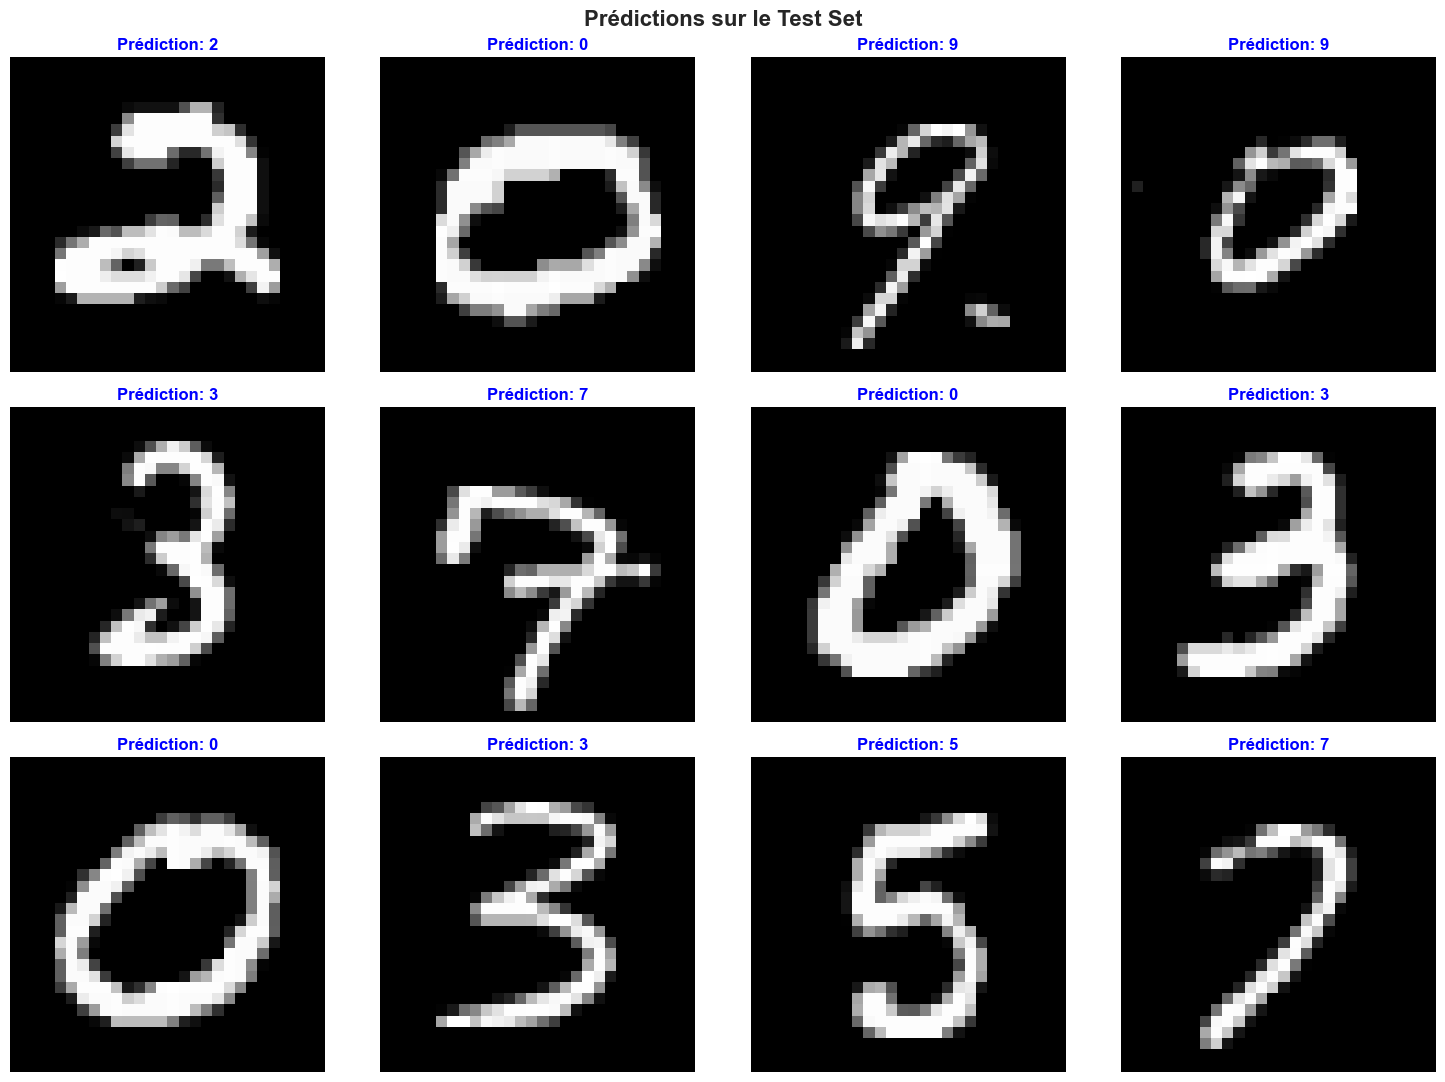

In [55]:
# Création du fichier de soumission 
submission = pd.DataFrame({
    'ImageId': range(1, len(predictions_test) + 1),
    'Label': predictions_test
})

submission.to_csv('submission.csv', index=False)
print("\n Fichier de soumission créé: 'submission.csv'")
print(f"   Nombre de prédictions: {len(predictions_test)}")

# Aperçu des prédictions
print("\n Aperçu des premières prédictions:")
print(submission.head(10))

# Distribution des prédictions
print("\n Distribution des chiffres prédits:")
print(submission['Label'].value_counts().sort_index())






# Visualisation de quelques prédictions du test

#
fig, axes = plt.subplots(3, 4, figsize=(15, 11))
fig.suptitle('Prédictions sur le Test Set', fontsize=16, fontweight='bold')

for i in range(12):
    row = i // 4
    col = i % 4
    
    image = X_test_normalized[i].reshape(28, 28)
    prediction = predictions_test[i]
    
    axes[row, col].imshow(image, cmap='gray')
    axes[row, col].set_title(f'Prédiction: {prediction}', 
                             fontsize=12, fontweight='bold', color='blue')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

